<a href="https://colab.research.google.com/github/tmaiecnj/CPE-313/blob/main/Hands-on%20Activity%204.3%20-%20Instance%20Segmentation%20on%20Custom%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objectives

This activity aims to introduce students to deep learning for object detection using relevant technologies for testing on custom data.

#Intended Learning Outcomes

After this activity, the students are expected to:

* Demonstrate instance segmentation using deep learning on a custom dataset.
* Evaluate the performance of model for segmentation tasks.

#Procedures

1. For this activity, access the following notebook and perform the following steps:
2. Document all of your issues and how you were able to resolve them.

## YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

## 0. Setup
Pull in respective libraries to prepare the notebook environment

In [ ]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content/yolov5


In [ ]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd /content/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.6/78.2 GB disk)


In [ ]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'/content/yolov5/weights/yolov5{x}.pt')

## 1. Inference on test image

To demonstrate YOLOv5 instance segmentation, we'll leverage an already trained model. In this case, we'll download the COCO-128 trained models pretrained on COCO-128 using YOLOv5 Utils.

If you'd like to skip to custom trainining, jump to section 3 below.

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 55.7ms
Speed: 0.5ms pre-process, 55.7ms inference, 482.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference2


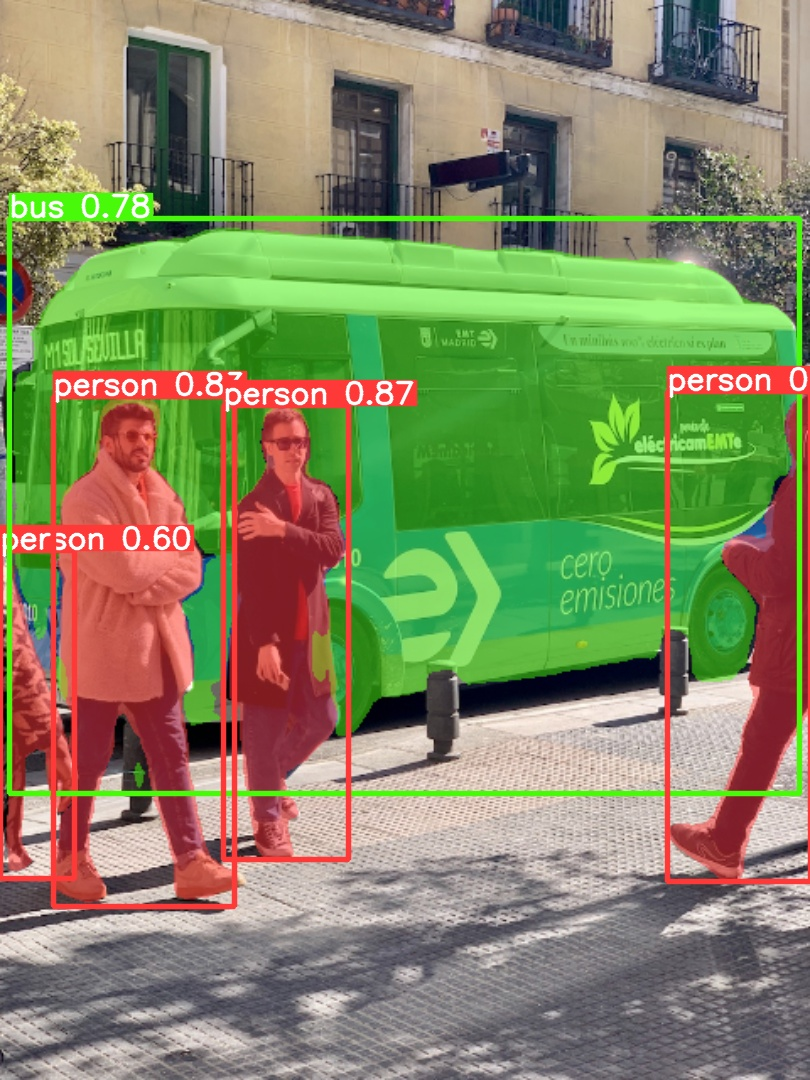

In [ ]:
# infer using segment/predict.py

%cd /content/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference
display.Image(filename=f"/content/yolov5/runs/predict-seg/test-inference/bus.jpg", width=600)

## 2. Infer on COCO image

In [ ]:
#Download example image
import requests
image_url = "https://2.bp.blogspot.com/_qDR6dTxi_aM/TDoS7T1wStI/AAAAAAAABTQ/ggsHsti-IdU/s1600/zebra_1.jpg"
response = requests.get(image_url)
response.raise_for_status()
with open(f"/content/yolov5/data/images/zebra.jpg", "wb") as handler:
    handler.write(response.content)

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/zebra.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/zebra.jpg: 480x640 1 zebra, 89.8ms
Speed: 0.6ms pre-process, 89.8ms inference, 668.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/coco2


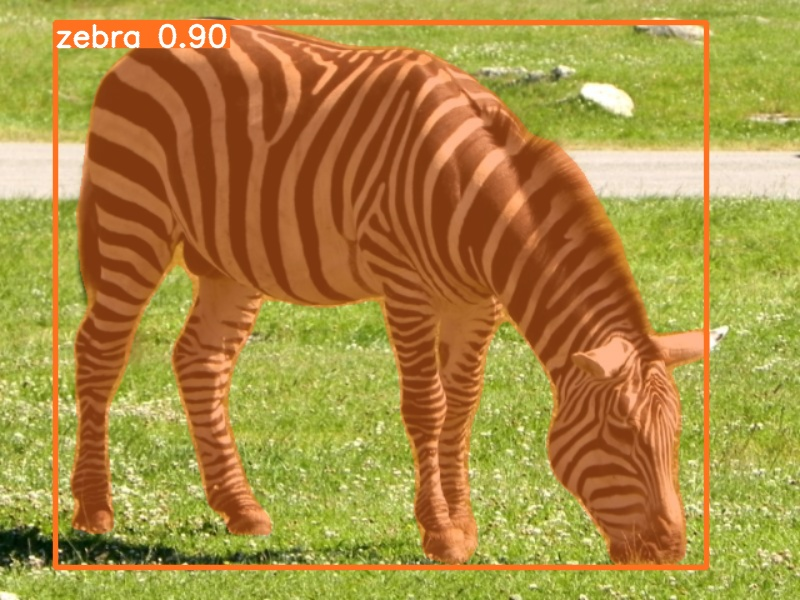

In [ ]:
#Infer using segment/predict.py
%cd /content/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/zebra.jpg --name coco
display.Image(filename=f"/content/yolov5/runs/predict-seg/coco/zebra.jpg", width=600)

## 3. (Optional) Validate

Use the `segment/val.py` script to run validation for the model. This will show us the model's performance.

First, we need to download COCO-128.

In [ ]:
torch.hub.download_url_to_file("https://ultralytics.com/assets/coco128-seg.zip", f"/content/tmp.zip")
!unzip -q /content/tmp.zip -d /content/yolov5/datasets
!rm /content/tmp.zip

100%|██████████| 6.79M/6.79M [00:00<00:00, 190MB/s]


replace /content/yolov5/datasets/coco128-seg/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
%cd /content/yolov5
!python /content/yolov5/segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640 --name coco

/content/yolov5
segment/val: data=/content/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=coco, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
val: Scanning /content/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:25<00:00,  6.33s/it]
                   all        128        929      0.693       0.65      0.712      0.488      0.675      0.626      0

The output shows performance metrics for the COCO-128 validation dataset.

## 4. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package.

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 instance segmentation on custom data](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset).)


Create a free Roboflow account, upload your data, and label.

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-format.gif)


Copy and paste that snippet into the cell below.

In [ ]:
%cd /content/yolov5
!pip install roboflow

from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR API KEY")
rf = Roboflow(api_key="28rI7BY19V4dmkIHjMpv")
project = rf.workspace("paul-guerrie-tang1").project("asl-poly-instance-seg")
dataset = project.version(24).download("yolov5")

/content/yolov5
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
%cat /content/yolov5/ASL-Poly-Instance-Seg-24/data.yaml

names:
- A
- B
- C
- D
- E
- F
- G
- H
- I
- J
- K
- L
- M
- N
- O
- P
- Q
- R
- S
- T
- U
- V
- W
- X
- Y
- Z
nc: 26
train: ASL-Poly-Instance-Seg-24/train/images
val: ASL-Poly-Instance-Seg-24/valid/images


### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [ ]:
%cd /content/yolov5
!python /content/yolov5/segment/train.py --img 320 --batch 128 --epochs 100 --data /content/yolov5/ASL-Poly-Instance-Seg-24/data.yaml --weights /content/yolov5/yolov5s-seg.pt

/content/yolov5
2024-03-31 04:35:54.990662: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 04:35:54.990715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 04:35:54.992101: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=/content/yolov5/yolov5s-seg.pt, cfg=, data=/content/yolov5/ASL-Poly-Instance-Seg-24/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, mult

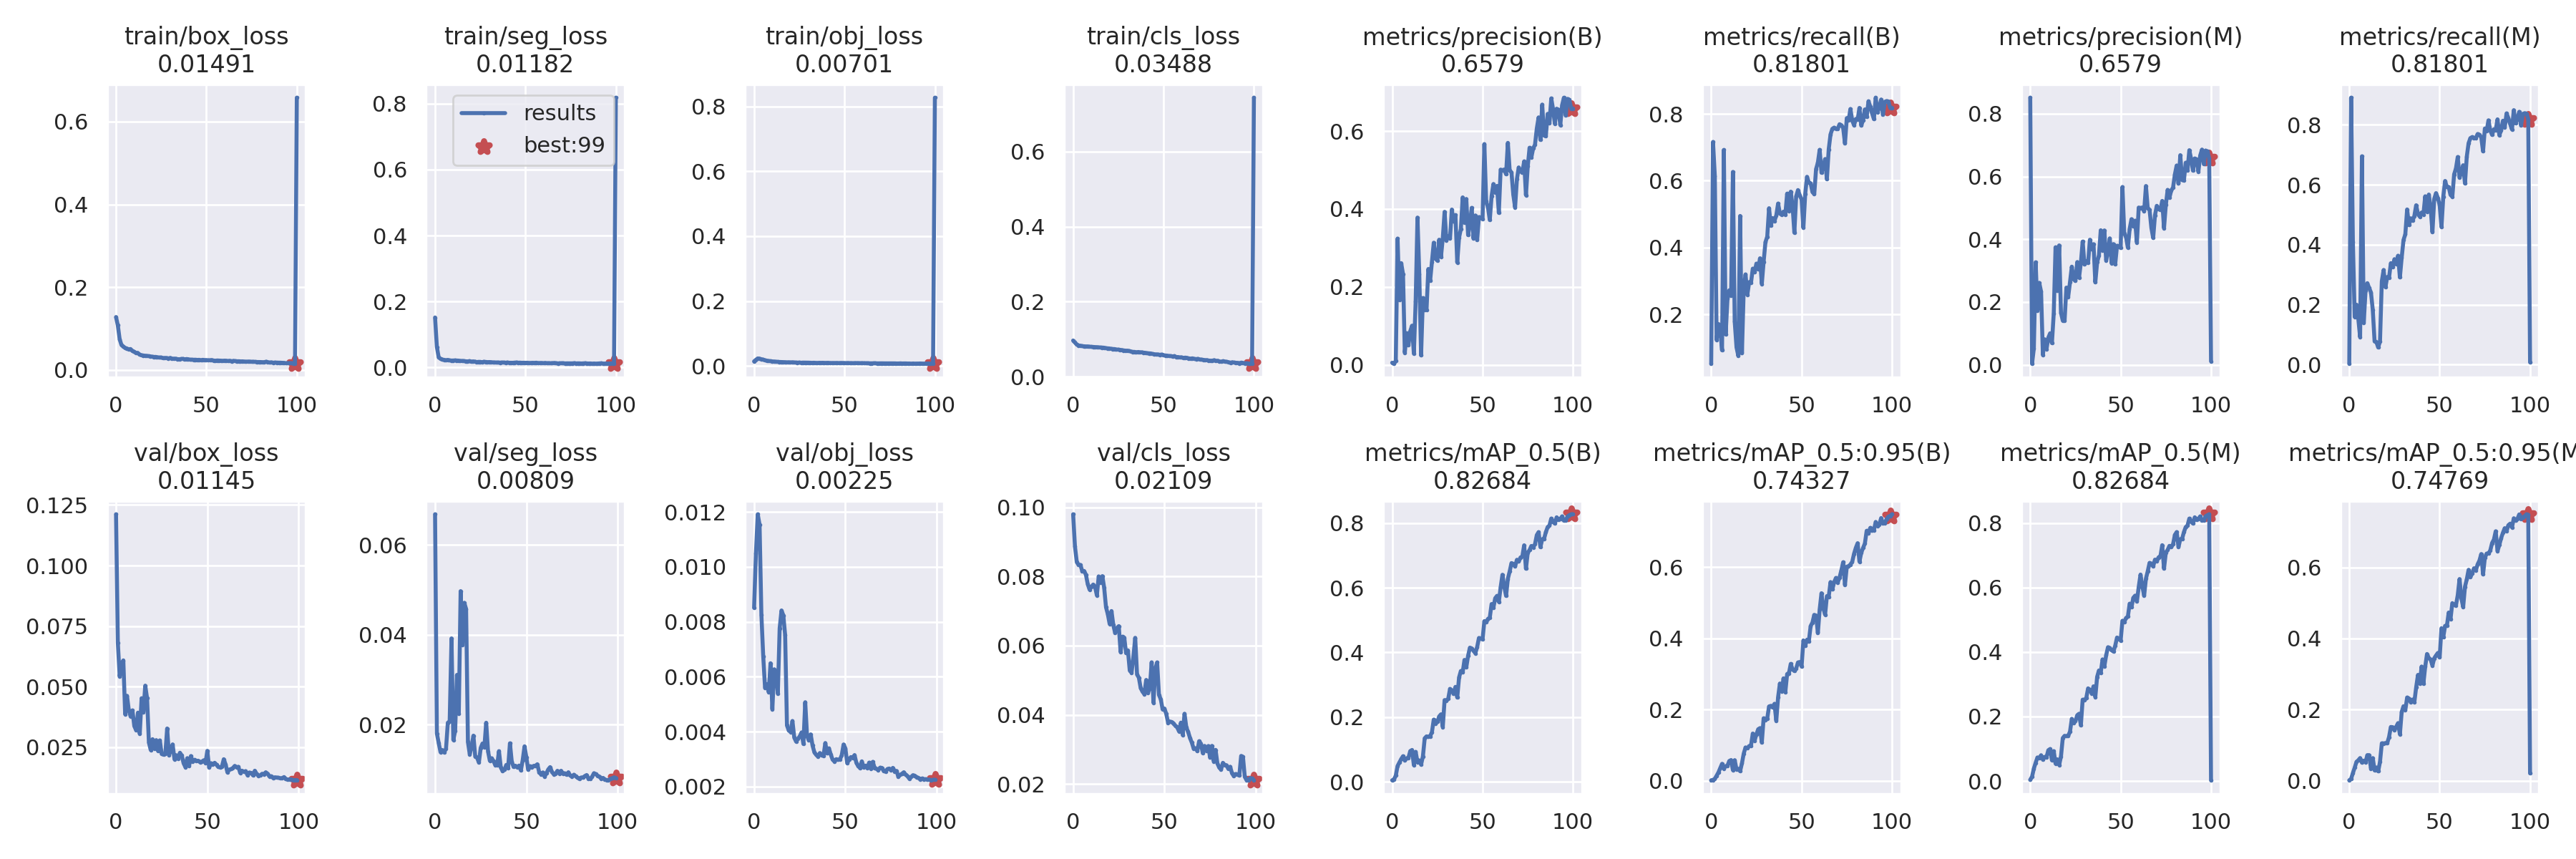

In [ ]:
display.Image(filename=f'/content/yolov5/runs/train-seg/exp3/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
%cd /content/yolov5
!python /content/yolov5/segment/val.py --weights /content/yolov5/runs/train-seg/exp3/weights/best.pt --data /content/yolov5/ASL-Poly-Instance-Seg-24/data.yaml --img 320

/content/yolov5
segment/val: data=/content/yolov5/ASL-Poly-Instance-Seg-24/data.yaml, weights=['/content/yolov5/runs/train-seg/exp3/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
val: Scanning /content/yolov5/ASL-Poly-Instance-Seg-24/valid/labels.cache... 334 images, 0 backgrounds, 0 corrupt: 100% 334/334 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 11/11 [00:10<00:00,  1.10it/s]
                   all        334        334      0.658      0.81

### Infer With Your Custom Model

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/exp3/weights/best.pt'], source=/content/yolov5/ASL-Poly-Instance-Seg-24/test/images/U16_jpg.rf.96e9f4f96bd6fd7e2f60d5353b883262.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
image 1/1 /content/yolov5/ASL-Poly-Instance-Seg-24/test/images/U16_jpg.rf.96e9f4f96bd6fd7e2f60d5353b883262.jpg: 320x320 1 X, 7.1ms
Speed: 0.4ms pre-process, 7.1ms inference, 527.4ms 

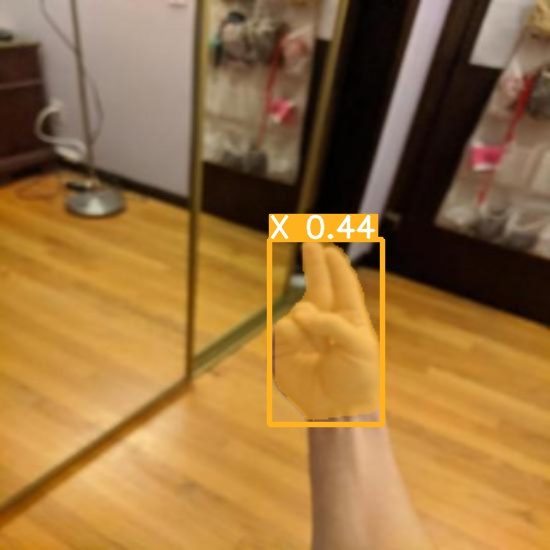

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd /content/yolov5
!python /content/yolov5/segment/predict.py --img 320 --weights /content/yolov5/runs/train-seg/exp3/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"/content/yolov5/runs/predict-seg/custom-dataset6/{example_image_name}", width=600)

The image above shows the resulting prediction overlayed on the input image.

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [ ]:
#Prepare Our Example Image Directory
#To run on your own images, replace the directory on the line below with a
#directory you provide (by uploading to the colab environment, for example)
example_image_dir = "../example_images"

#We are going to download example images from the web for the purposes of this
#demo. These images are relevant to the ASL Poly dataset. Skip the rest of this
#cell if you are providing your own example image directory.
os.makedirs(example_image_dir, exist_ok=True)
image_urls = [
    "https://image.shutterstock.com/image-photo/how-sign-letter-l-using-250nw-41296000.jpg",
    "https://tiffytaffy.com/wp-content/uploads/2021/07/jul05_part03_27.jpg",
    "https://img.wonderhowto.com/img/59/08/63494545479813/0/exam-coming-up-use-anaglyph-3d-trick-combine-two-cheat-sheets-into-one.w1456.jpg"
    ]

for i, image_url in enumerate(image_urls):
    response = requests.get(image_url)
    response.raise_for_status()
    with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
        handler.write(response.content)

In [ ]:
#Infer On Directory
!python /content/yolov5/segment/predict.py --img 320 --weights /content/yolov5/runs/train-seg/exp3/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['/content/yolov5/runs/train-seg/exp3/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
image 1/3 /content/example_images/example_0.jpg: 320x288 1 L, 57.9ms
image 2/3 /content/example_images/example_1.jpg: 192x320 1 I, 1 K, 56.3ms
image 3/3 /content/example_images/example_2.jpg: 224x320 1 H, 57.4ms
Speed: 0.3ms pre-process, 57.2ms inference, 155.9ms NMS per image at shape (1, 3, 

In [ ]:
#Read Results Files and Conditionally Upload

#If my model has a confidence of less than 80% for a prediction, let's help it
#out by uploading this image back to our dataset. Then we can add a ground truth
#label to it so that it will be included in our next training run and future
#prediction results will improve.
MIN_CONF_THRESHOLD = 0.8

for i, txt_file in enumerate(os.listdir("/content/yolov5/runs/predict-seg/exp3/labels")):
    with open(os.path.join("/content/yolov5/runs/predict-seg/exp3/labels", txt_file), 'r') as fid:
        for line in fid:
            parts = line.split()
            if len(parts) < 6:
                print(f"Invalid line: {line.strip()}")  # Print the line for debugging
                continue  # Skip processing this line

            label, x1, y1, x2, y2, conf = parts[:6]
            try:
                conf = float(conf)
            except ValueError:
                print(f"Invalid confidence value in line: {line.strip()}")  # Print the line for debugging
                continue  # Skip processing this line if confidence is not a valid float

            if conf < MIN_CONF_THRESHOLD:
                print(f"Image has a low confidence prediction, uploading to project: example_{i}.jpg")
                break

Image has a low confidence prediction, uploading to project: example_0.jpg
Image has a low confidence prediction, uploading to project: example_1.jpg
Image has a low confidence prediction, uploading to project: example_2.jpg


## Issues in procedure and how I resolve them:

1. The main problem when debugging in this notebook is often related to finding the right folder. Sometimes, when you run the code, it creates a new folder, which means the current code won't work because it's looking in the wrong place.

2. The biggest challenge in this activity is the limit on using the GPU. This makes it hard to keep running the code multiple times because I reaches the limit. This is important when working with images because we need the GPU for faster processing. The models also use a lot of matrix operations to process and analyze large amounts of data efficiently.

   a. To solve this, I have a few options. I prefer sticking with using Google Colab because it's more reliable for me. What I do is use a different Gmail account to run the code when I hit the limit. It's a bit of a hassle, but I trust Google Colab more."

   b. Another option I tried is using Kaggle kernels, but I found them difficult to understand and manage."

Apart from these issues, there aren't any major problems with the process because the model used in this notebook is YOLOv8, which is the latest version and has many improvements, reducing the need for lots of debugging.

#Supplementary Activity

1. Demonstrate instance segmentation on your custom dataset.
2. Research on evaluation metrics for instance segmentation:
  
  How can you evaluate the performance of an instance and semantic segmentation model?
3. Evaluate the performance of the model on your own dataset.


## 1. Demonstrate instance segmentation on your custom dataset.

### Set Up Environment

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [9]:
!git clone https://github.com/ultralytics/yolov5.git # clone
%cd /content/yolov5
#%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.8/78.2 GB disk)


In [3]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'/content/yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 52.3MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 141MB/s]

100%|██████████| 42.4M/42.4M [00:00<00:00, 207MB/s]

100%|██████████| 91.9M/91.9M [00:00<00:00, 213MB/s]

100%|██████████| 170M/170M [00:00<00:00, 226MB/s]



### Preparing Custom Dataset

In [4]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 36.66 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [5]:
!pip3 install -r /content/yolov5/OIDv4_ToolKit/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


### Data Loading and Preprocessing

In [6]:
!python /content/yolov5/OIDv4_ToolKit/main.py downloader --classes  Glasses Girl Boy --type_csv all --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Glasses.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 58353 KB/s, 0 seconds passed
[DOWNLOAD] | File 

In [ ]:
!pip install roboflow
from roboflow import Roboflow

In [11]:
rf = Roboflow(api_key="28rI7BY19V4dmkIHjMpv")
project = rf.workspace("main-9b7gg").project("supplementary-4.3-bqijn")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Supplementary-4.3-1 in yolov5pytorch:: 100%|██████████| 6402/6402 [00:01<00:00, 5690.82it/s]


### Model Configuration and Training

In [5]:
%cat /content/Supplementary-4.3-1/data.yaml

names:
- Boy
- Girl
- Glasses
nc: 3
roboflow:
  license: CC BY 4.0
  project: supplementary-4.3-bqijn
  url: https://universe.roboflow.com/main-9b7gg/supplementary-4.3-bqijn/dataset/1
  version: 1
  workspace: main-9b7gg
test: ../test/images
train: Supplementary-4.3-1/train/images
val: Supplementary-4.3-1/valid/images


In [12]:
%cd /content/yolov5

!python /content/yolov5/segment/train.py --img 320 --batch 128 --epochs 15 --data /content/yolov5/Supplementary-4.3-1/data.yaml --weights /content/yolov5/weights/yolov5s-seg.pt

/content/yolov5
2024-04-01 15:31:02.234196: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 15:31:02.234252: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 15:31:02.235612: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=/content/yolov5/weights/yolov5s-seg.pt, cfg=, data=/content/yolov5/Supplementary-4.3-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=15, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, mu

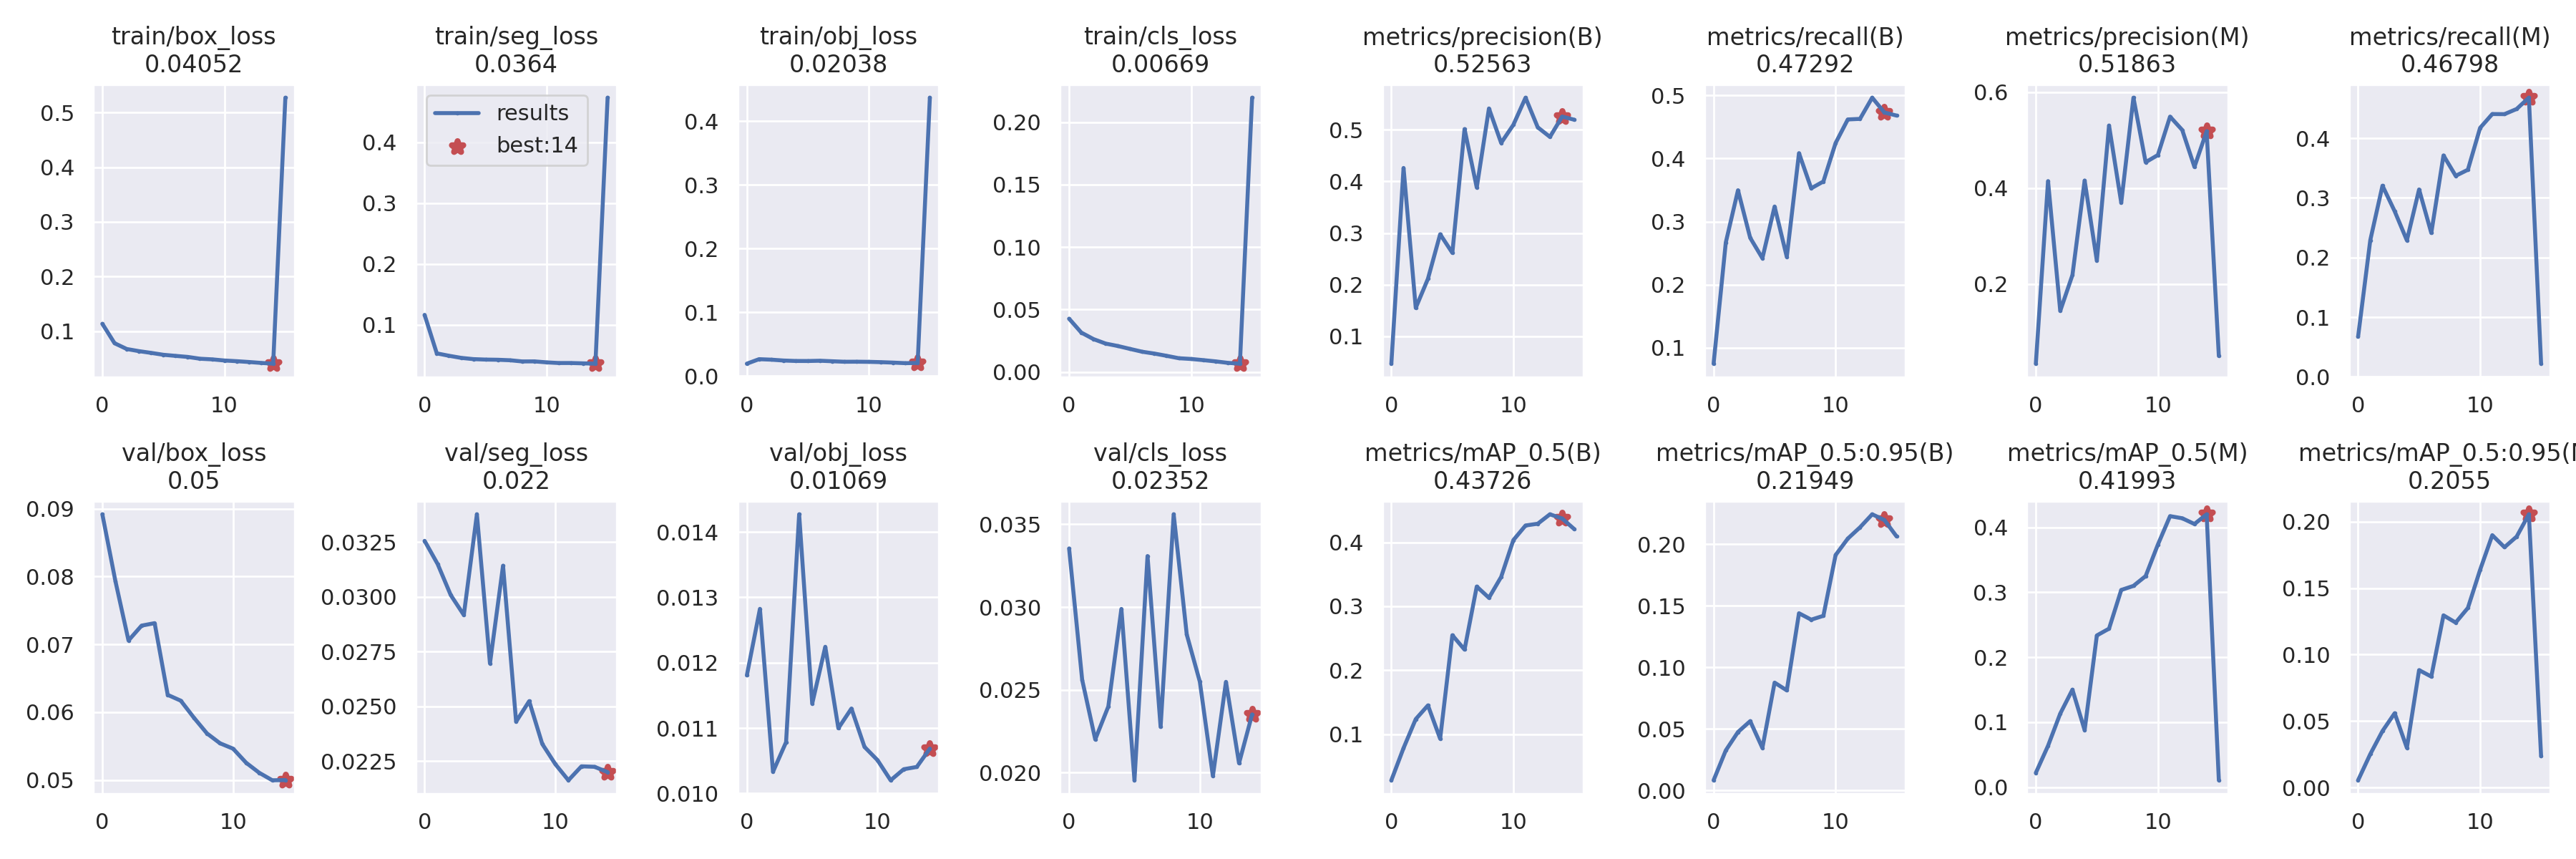

In [13]:
display.Image(filename=f'/content/yolov5/runs/train-seg/exp5/results.png', width=1200)

### Validate Custom Model

In [15]:
%cd /content/yolov5

!python /content/yolov5/segment/val.py --weights /content/yolov5/runs/train-seg/exp5/weights/best.pt --data /content/yolov5/Supplementary-4.3-1/data.yaml --img 320

/content/yolov5
segment/val: data=/content/yolov5/Supplementary-4.3-1/data.yaml, weights=['/content/yolov5/runs/train-seg/exp5/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/Supplementary-4.3-1/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 7/7 [00:07<00:00,  1.10s/it]
                   all        200        341      0.526      0.473      0.437

### Model Evaluation and Usage

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/exp5/weights/best.pt'], source=/content/yolov5/Supplementary-4.3-1/test/images/e5ac065aa5e9cf45_jpg.rf.0795f98634b9c80486b98e0e8e2c7f87.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/Supplementary-4.3-1/test/images/e5ac065aa5e9cf45_jpg.rf.0795f98634b9c80486b98e0e8e2c7f87.jpg: 320x320 3 Bo

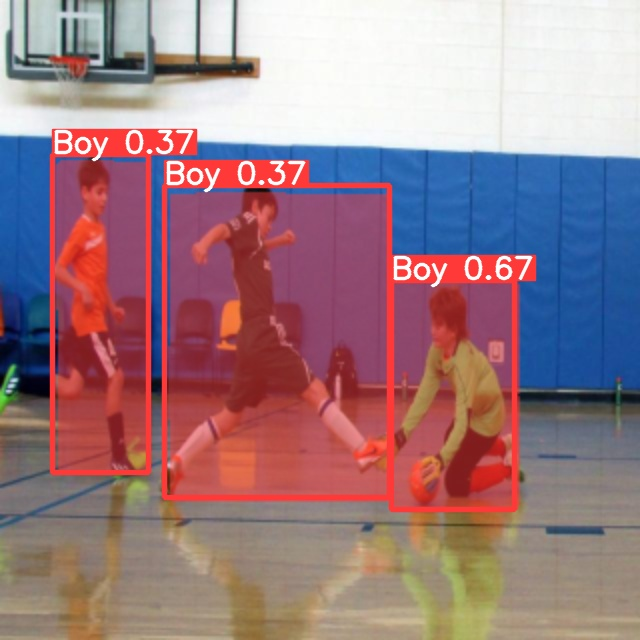

In [55]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[27]
example_image_path = os.path.join(split_path, example_image_name)

%cd /content/yolov5
!python /content/yolov5/segment/predict.py --img 320 --weights /content/yolov5/runs/train-seg/exp5/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"/content/yolov5/runs/predict-seg/custom-dataset7/{example_image_name}", width=600)

In [18]:
import requests

example_image_dir = "../example_images"

os.makedirs(example_image_dir, exist_ok=True)
image_urls = [
    "https://i.pinimg.com/564x/c0/92/e9/c092e9883015574800e0c52c9c152f50.jpg",
    "https://i.pinimg.com/564x/ec/70/21/ec7021ad7bcf841cecf8cf0a8d3e70cf.jpg",
    "https://i.pinimg.com/564x/6d/06/d6/6d06d675cb643a52bb39203e415a73a5.jpg"
    ]

for i, image_url in enumerate(image_urls):
    response = requests.get(image_url)
    response.raise_for_status()
    with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
        handler.write(response.content)

In [19]:
#Infer On Directory
!python /content/yolov5/segment/predict.py --img 320 --weights /content/yolov5/runs/train-seg/exp5/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['/content/yolov5/runs/train-seg/exp5/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
image 1/3 /content/example_images/example_0.jpg: 320x320 2 Glassess, 6.3ms
image 2/3 /content/example_images/example_1.jpg: 320x224 1 Glasses, 53.2ms
image 3/3 /content/example_images/example_2.jpg: 320x224 2 Glassess, 6.4ms
Speed: 0.3ms pre-process, 22.0ms inference, 154.7ms NMS per image at 

In [22]:
MIN_CONF_THRESHOLD = 0.8

for i, txt_file in enumerate(os.listdir("/content/yolov5/runs/predict-seg/exp/labels")):
    with open(os.path.join("/content/yolov5/runs/predict-seg/exp/labels", txt_file), 'r') as fid:
        for line in fid:
            parts = line.split()
            if len(parts) < 6:
                print(f"Invalid line: {line.strip()}")  # Print the line for debugging
                continue  # Skip processing this line

            label, x1, y1, x2, y2, conf = parts[:6]
            try:
                conf = float(conf)
            except ValueError:
                print(f"Invalid confidence value in line: {line.strip()}")  # Print the line for debugging
                continue  # Skip processing this line if confidence is not a valid float

            if conf < MIN_CONF_THRESHOLD:
                print(f"Image has a low confidence prediction, uploading to project: example_{i}.jpg")
                break

Image has a low confidence prediction, uploading to project: example_0.jpg
Image has a low confidence prediction, uploading to project: example_1.jpg
Image has a low confidence prediction, uploading to project: example_2.jpg


In [29]:
image_paths = [
    '/content/yolov5/runs/predict-seg/exp/example_0.jpg',
    '/content/yolov5/runs/predict-seg/exp/example_1.jpg',
    '/content/yolov5/runs/predict-seg/exp/example_2.jpg'
]

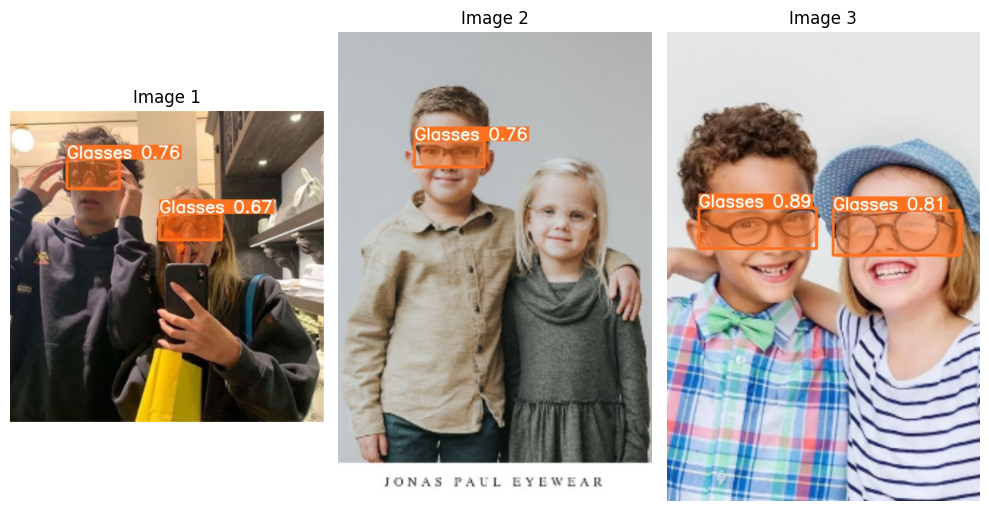

In [33]:
import matplotlib.pyplot as plt
from PIL import Image

fig, axs = plt.subplots(1, len(image_paths), figsize=(10, 5))

for i, img_path in enumerate(image_paths):
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

## 2. Research on evaluation metrics for instance segmentation:

How can you evaluate the performance of an instance and semantic segmentation model?

## 3. Evaluate the performance of the model on your own dataset.

In [51]:
image_paths = [
    '/content/yolov5/example_owndataset/344477325_254764040262150_9003099978914263441_n.jpg',
    '/content/yolov5/example_owndataset/426715939_7590828160975502_6556591402386033709_n.jpg',
    '/content/yolov5/example_owndataset/WIN_20231103_09_26_34_Pro.jpg'
]

In [ ]:
%cd /content/yolov5
!python /content/yolov5/segment/predict.py --img 320 --weights /content/yolov5/runs/train-seg/exp5/weights/best.pt --data image_paths --name custom-dataset

In [ ]:
!python /content/yolov5/segment/predict.py --img 320 --weights /content/yolov5/runs/train-seg/exp5/weights/best.pt --data image_paths --save-txt --save-conf

In [ ]:
MIN_CONF_THRESHOLD = 0.8

for i, txt_file in enumerate(os.listdir("/content/yolov5/runs/predict-seg/exp/labels")):
    with open(os.path.join("/content/yolov5/runs/predict-seg/exp/labels", txt_file), 'r') as fid:
        for line in fid:
            parts = line.split()
            if len(parts) < 6:
                print(f"Invalid line: {line.strip()}")  # Print the line for debugging
                continue  # Skip processing this line

            label, x1, y1, x2, y2, conf = parts[:6]
            try:
                conf = float(conf)
            except ValueError:
                print(f"Invalid confidence value in line: {line.strip()}")  # Print the line for debugging
                continue  # Skip processing this line if confidence is not a valid float

            if conf < MIN_CONF_THRESHOLD:
                print(f"Image has a low confidence prediction, uploading to project: example_{i}.jpg")
                break

In [ ]:
fig, axs = plt.subplots(1, len(image_paths), figsize=(10, 5))

for i, img_path in enumerate(image_paths):
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].axis('on')
    axs[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()